In [1]:
import tensorflow as tf

In [2]:
# Other imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-02-09 07:25:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-02-09 07:26:00 (33.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
# Load in the data
df = pd.read_csv('/content/moore.csv', header = None).values
X = df[:, 0].reshape(-1, 1) # Make it a 2-D array of size N x D where D = 1
y = df[:,1]

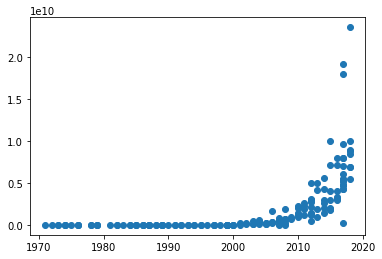

In [6]:
# Plot the data
plt.scatter(X, y)

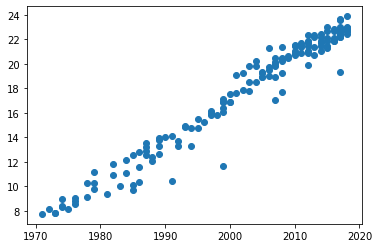

In [8]:
# Since we want a linear model, let's take the log
y = np.log(y)
plt.scatter(X, y)

In [9]:
# Let's center the X data so the values are not too large
X = X - X.mean()

In [12]:
# Now create our TensforFlow model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input( shape = (1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')

# Learning rate scheduler 
def schedule(epoch, lr):
  if epoch >= 50:
    return  0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, y, epochs = 200, callbacks= [scheduler])


Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 473.7623
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 558.5111
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 584.5986
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 324.7263
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 257.3656
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 172.6893
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 107.0525
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 124.0602
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 60.9280
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 41.1677
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 30.9717
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 22.7024
Epoch 13/200
6/6 [=======================

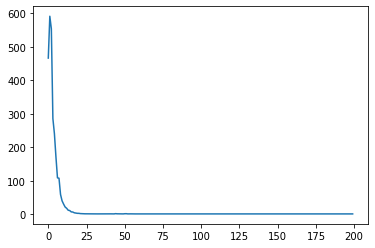

In [14]:
# Plot the loss
plt.plot(r.history['loss'], label = "Loss")

In [15]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: There is only one 1 layer, the 'Input' layer doesn't count
print(model.layers[0].get_weights())

[array([[0.33742255]], dtype=float32), array([17.754751], dtype=float32)]


In [16]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [17]:
print("Time to double:", np.log(2) / a)

Time to double: 2.054240835788025


In [18]:
X = np.array(X).flatten()
y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum() / denominator)
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
print(a,b)
print("Time to double:" , np.log(2) / a)

10309.817698564839 17.764939393631764
Time to double: 6.723175916645293e-05
